In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from scripts_ml.ann_utils import *

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17952145485654026931
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1450105241
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2083612853877826460
physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [3]:
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
prefix_time_seq = 'time_2018-04-30_p90_bg_'
valid_code = '_val_26000_2000_'
postfix_time_seq_val = '_190824_1722'
postfix_time_seq = '_190824_1230'
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
indexfile = '_fold_indexes'
expname = "MLP_"+preproc_folder+valid_code.split('_val_')[1][:-1]+"_opt_p90"

-Loading preprocessed data...
validation training files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_p90_bg__val_26000_2000__traindata_190824_1722.pkl
validation testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_p90_bg__val_26000_2000__testdata_190824_1722.pkl
training files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_p90_bg__traindata_190824_1230.pkl
testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_p90_bg__testdata_190824_1230.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 95)                3420      
_________________________________________________________________
dropout (Dropout)            (None, 95)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 95)                380      

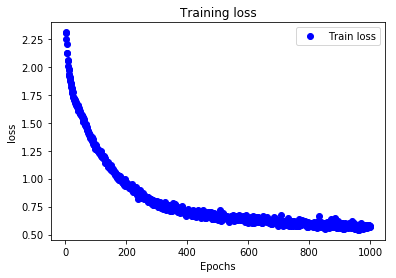

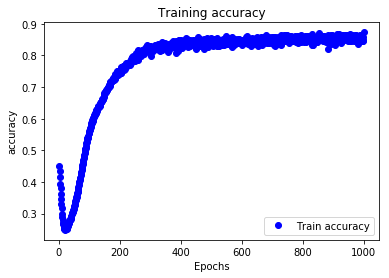

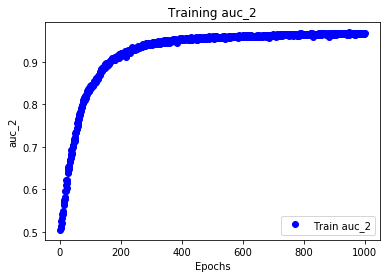

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 95)                3420      
_________________________________________________________________
dropout_10 (Dropout)         (None, 95)                0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 95)                380       
_________________________________________________________________
dense_13 (Dense)             (None, 70)                6720      
_________________________________________________________________
dropout_11 (Dropout)         (None, 70)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 70)                280       
_________________________________________________________________
dense_14 (Dense)             (None, 45)               

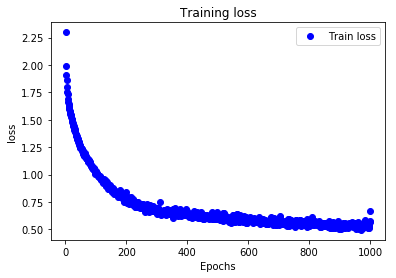

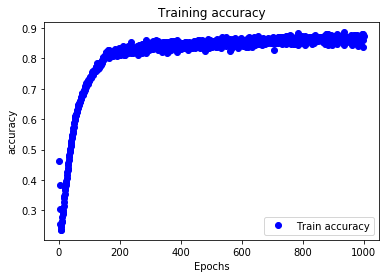

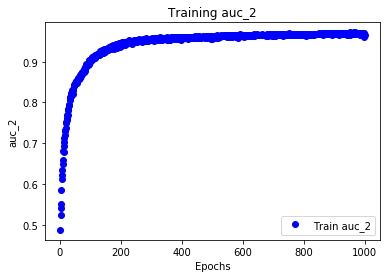

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 95)                3420      
_________________________________________________________________
dropout_15 (Dropout)         (None, 95)                0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 95)                380       
_________________________________________________________________
dense_19 (Dense)             (None, 70)                6720      
_________________________________________________________________
dropout_16 (Dropout)         (None, 70)                0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 70)                280       
_________________________________________________________________
dense_20 (Dense)             (None, 45)               

KeyboardInterrupt: 

In [4]:
with tf.device("/device:GPU:0"):
    experiment = mlp_exp_timeseq(datafolder, prefix_time_seq, postfix_time_seq,
                    postfix_time_seq_val, valid_code, indexfile,
                             experiment_name=expname, 
                             hidden_layers_no=5,  #4
                             hidden_nodes=[95, 70, 45,30,15],
                             optimizer=Adam(0.001),
                             hl_activations=[tf.nn.relu]*5,       #[tf.nn.relu]*4,
                             dropout=[0.5]*5,            #[0.5]*2,
                             loss_func = tf.keras.losses.BinaryCrossentropy(),
                             metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                             to_monitor=('accuracy', 0.9),
                             validation_ep=True,
                             epochs=1000, 
                             batch_size=2048,
                             batch_norm_layers=[0,1,2,3,4,5],
                             use_batch_and_steps=False,
                             class_1_weight=25,
                             pred_threshold = 0.55,
                             verbose=0,
                             early_stopping=True, 
                             save_model=True, 
                             save_results_for_viz=False,
                             mlf_tracking=True)